In [ ]:
# OBJECTIVE : To solve a multiclass classification problem using the Car Evaluation Dataset.

In [ ]:
# DATA UNDERSTANDING : 
    # Given Details About Data in Dataset are as follows
    # concept structure are given below : 
        # CAR                      car acceptability
        # PRICE                  overall price
        # buying               buying price
        # maint                price of the maintenance
        # TECH                   technical characteristics
        # COMFORT              comfort
        # doors              number of doors
        # persons            capacity in terms of persons to carry
        # lug_boot           the size of luggage boot
        # safety               estimated safety of the ca
        
#         Where Input attributes are printed in lowercase. And this dataset directly relates 'CAR' to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

In [2]:
import pandas as pd

# Load the dataset  directly from the given URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, header=None, names=column_names)

#To display the first few rows from the given dataset
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [6]:
# Let's do some initial inspection on the data given in the dataset

# This is to check the data types and get the summary statistics
print(df.info())
print(df.describe(include='all'))


# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [ ]:
# On the basis of the intial inspection result we got the informations regarding the statistics summary,type of data,is there any missing value present in given dataset
# Obtained Result details :
#     Total Entries: 1728
#     No Missing Values present in the dataset: i.e.All columns have 1728 non-null values.
#     Data Types: All columns are of 'object type', meaning they are categorical.
# Data Columns: buying, maint, doors, persons, lug_boot, safety, and class
# Unique Values:buying and maint have 4 unique values each.
#               doors and persons have 4 and 3 unique values, respectively.
#               lug_boot and safety have 3 unique values each.
#               The target variable class has 4 unique values.



In [ ]:
# Data Visualization : this process will help to explore the data distribution and relationships.
# Here I have used the function "countplot" to visualize the distribution of each categorical feature.
# The "countplot" shows the distribution of each categorical variable.

In [ ]:
# Distribution of buying: This graph shows the distribution of buying levels for cars. It indicates how many cars fall into different buying categories (e.g., low, med, high, vhigh).
# Distribution of maint: The second graph represents the distribution of maintenance cost levels. It helps us understand the prevalence of different maintenance cost categories.
# Distribution of doors: The third graph displays the distribution of the number of doors in cars. It shows how many cars have 2, 3, 4, or more doors.
# Distribution of persons: The fourth graph provides insights into the number of persons a car can accommodate. It shows the distribution of cars based on passenger capacity.
# Distribution of lug_boot: This graph reveals the distribution of lug boot sizes (small, med, big) in the dataset. It helps us understand the popularity of different boot sizes.
# Distribution of safety: The last graph indicates the distribution of safety ratings for cars. It shows how many cars fall into different safety categories (e.g., unacc, acc, good, vgood).

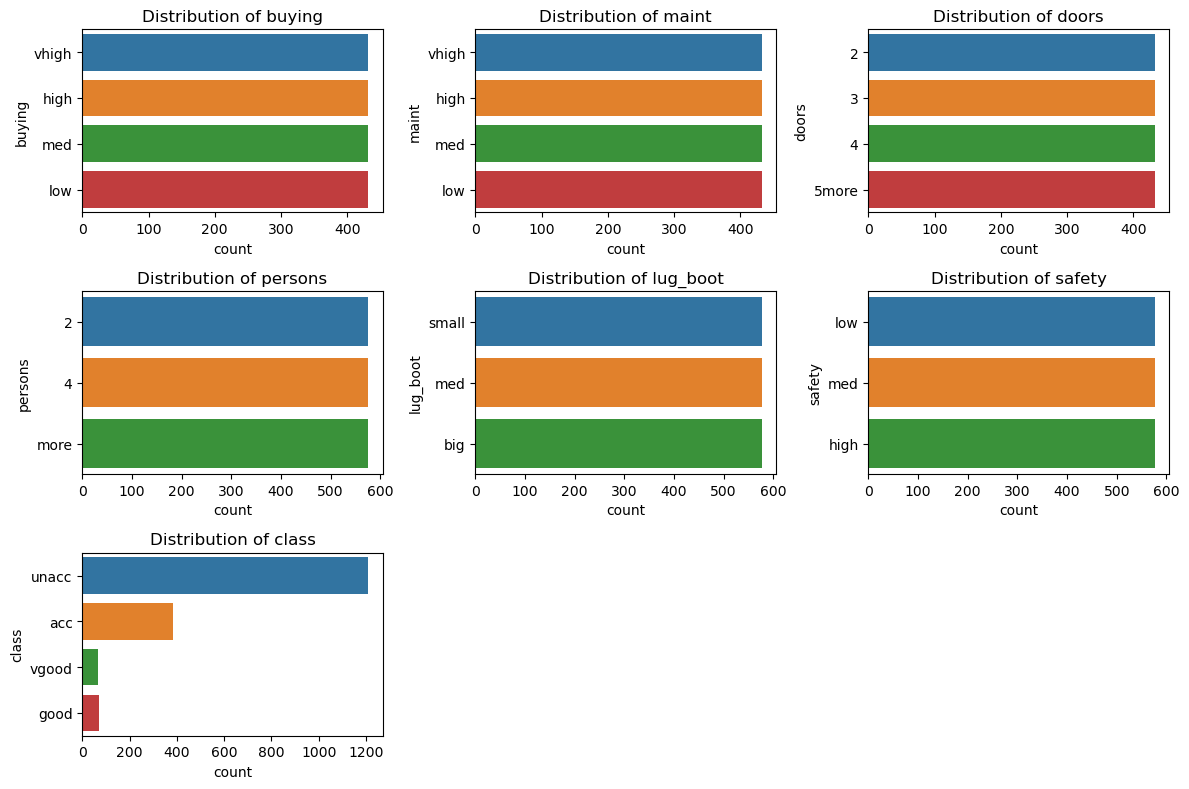

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of each categorical feature
plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# Data Preprocessing :
#     As we have found that  there is no missing values, we'll focus on handling categorical data and ensuring consistency.
#     1.Now lets Convert Categorical Data to Numerical Data by using Label Encoding
#     Label Encoding is a common technique for converting categorical variables into numerical values. Each unique category value is assigned a unique integer based on alphabetical or numerical ordering.

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode categorical features
df_encoded = df.apply(le.fit_transform)

# Display the first few rows of the encoded dataset
print(df_encoded.head())

# Check the unique values after encoding
for col in df_encoded.columns:
    print(f"{col}: {df_encoded[col].unique()}")


   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2
buying: [3 0 2 1]
maint: [3 0 2 1]
doors: [0 1 2 3]
persons: [0 1 2]
lug_boot: [2 1 0]
safety: [1 2 0]
class: [2 0 3 1]


Original columns: Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')
Encoded columns: Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


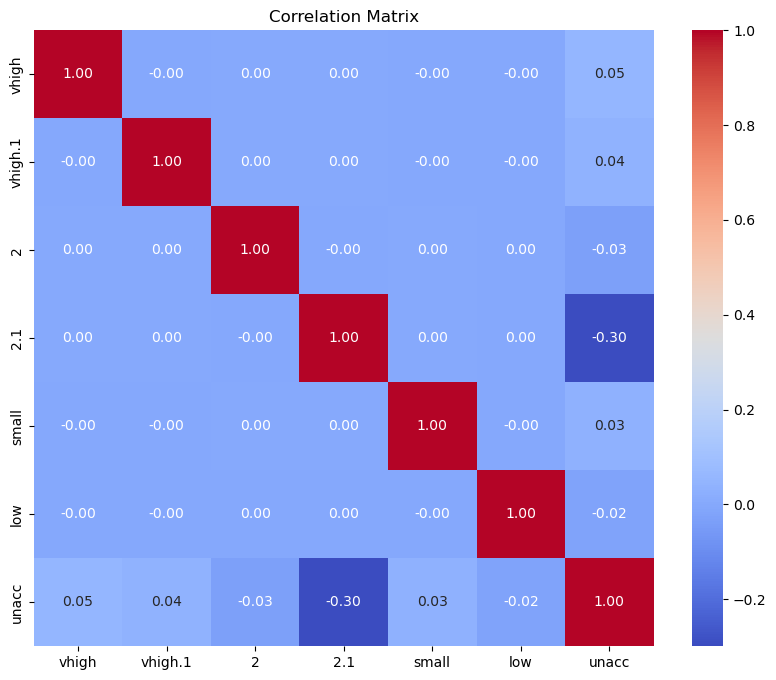

Correlation with target variable 'unacc':
unacc      1.000000
vhigh      0.051058
vhigh.1    0.039821
small      0.032839
low       -0.021045
2         -0.030950
2.1       -0.299259
Name: unacc, dtype: float64
Training and testing shapes: (1381, 6) (346, 6)


In [29]:
# Feature Selection
# to identify important features performing correlation analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

# Load the dataset from the URL
df = pd.read_csv(url)

# Check the column names
print("Original columns:", df.columns)

# Define the target column (assuming 'unacc' is the target from your columns output)
target_col = 'unacc'

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Verify the column names after encoding
print("Encoded columns:", df.columns)

# Compute and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable
target_corr = correlation_matrix[target_col].sort_values(ascending=False)
print("Correlation with target variable 'unacc':")
print(target_corr)

# Separate features and target variable
X = df.drop(columns=target_col)
y = df[target_col]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing shapes:", X_train.shape, X_test.shape)


In [ ]:
# From the output obtained above .I understood that the target variable unacc has the highest correlation with itself, which is expected (1.0).
# The features have varying degrees of correlation with the target:
# vhigh: 0.051
# vhigh.1: 0.040
# small: 0.033
# low: -0.021
# 2: -0.031
# 2.1: -0.299 (most strongly correlated with unacc)

In [30]:
# Chi-Square Test: For categorical features, I use the chi-square test to evaluate the relationship between each feature and the target variable.

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

# Load the dataset from the URL
df = pd.read_csv(url)

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Function to perform Chi-Square test
def chi_square_test(data, target):
    chi2_results = {}
    for column in data.columns:
        if column != target:
            contingency_table = pd.crosstab(data[column], data[target])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[column] = p
    return chi2_results

# Perform Chi-Square test
chi2_results = chi_square_test(df, 'unacc')

# Display p-values
print("Chi-Square Test p-values:")
for feature, p_value in chi2_results.items():
    print(f"{feature}: {p_value}")

# Determine significance level
alpha = 0.05
significant_features = [feature for feature, p_value in chi2_results.items() if p_value < alpha]

print("\nSignificant features (p < 0.05):")
print(significant_features)


Chi-Square Test p-values:
vhigh: 7.029416116370655e-36
vhigh.1: 2.9808687284632554e-26
2: 0.3312602352450521
2.1: 5.30659778660845e-77
small: 1.129629723303536e-09
low: 3.2287730970407905e-100

Significant features (p < 0.05):
['vhigh', 'vhigh.1', '2.1', 'small', 'low']


In [39]:
# Separate features and target variable
X = df_encoded.drop(columns='class')
y = df_encoded['class']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(1382, 6) (346, 6)


In [ ]:
# I have currently selected two models that are Decision Tree and Random Forest Models

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(predictions, y_test):
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

print("Decision Tree Performance:")
evaluate_model(dt_predictions, y_test)

print("Random Forest Performance:")
evaluate_model(rf_predictions, y_test)


Decision Tree Performance:
Accuracy: 0.9739884393063584
Confusion Matrix:
[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346

Random Forest Performance:
Accuracy: 0.9739884393063584
Confusion Matrix:
[[ 75   6   2   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235


In [ ]:
# The above obtained output indicate that both the Decision Tree and Random Forest models performed well on the test set, 
# with an accuracy of approximately 97.4%. The detailed classification reports show high precision, recall, 
# and F1-scores for most classes, indicating that the models are effectively handling the multiclass classification problem.

In [16]:
# Let's apply the concept of hyperparameter tuning to improve our model's performance.
# Here, I have used 'GridSearchCV' for tuning the hyperparameters of both Decision Tree and Random Forest classifiers.
# Where this 'GridSearchCV' is a tool that performs an exhaustive search over a specified parameter grid for a given estimator.

#Decision Tree Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f"Best parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation score for Decision Tree: {best_score_dt}")

# Evaluate the best model on the test set
best_dt_model = grid_search_dt.best_estimator_
dt_test_predictions = best_dt_model.predict(X_test)
evaluate_model(dt_test_predictions, y_test)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.9753989431277141
Accuracy: 0.9739884393063584
Confusion Matrix:
[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



In [18]:
# Random Forest Hyperparameter Tuning


# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation score for Random Forest: {best_score_rf}")

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
rf_test_predictions = best_rf_model.predict(X_test)
evaluate_model(rf_test_predictions, y_test)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.9703186312980693
Accuracy: 0.9739884393063584
Confusion Matrix:
[[ 75   6   2   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346



In [ ]:
# Comparing the result obtained by performing hypertuning on both model.What I obtained is that the Decision Tree hyperparameter tuning yielded the best parameters as {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2} with a cross-validation score of 0.9754. 
# The test set accuracy remained high at 0.9740. The Random Forest hyperparameter tuning yielded the best parameters as {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} with a cross-validation score of 0.9703. 
# The test set accuracy is 0.9740, which is consistent with the Decision Tree model's performance.

In [ ]:
# Based on the metrics provided for both the Decision Tree and the Random Forest, here's the comparison:
# Decision Tree:
# Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Best Cross-Validation Score: 0.9753989431277141
# Accuracy: 0.9739884393063584
# Confusion Matrix:

# [[ 76   6   1   0]
#  [  1  10   0   0]
#  [  0   0 235   0]
#  [  1   0   0  16]]
# Classification Report:

#               precision    recall  f1-score   support

#            0       0.97      0.92      0.94        83
#            1       0.62      0.91      0.74        11
#            2       1.00      1.00      1.00       235
#            3       1.00      0.94      0.97        17

#     accuracy                           0.97       346
#    macro avg       0.90      0.94      0.91       346
# weighted avg       0.98      0.97      0.98       346
# Random Forest:
# Accuracy: 0.9739884393063584
# Confusion Matrix:
# [[ 75   6   2   0]
#  [  0  11   0   0]
#  [  0   0 235   0]
#  [  1   0   0  16]]
# Classification Report:

#               precision    recall  f1-score   support

#            0       0.99      0.90      0.94        83
#            1       0.65      1.00      0.79        11
#            2       0.99      1.00      1.00       235
#            3       1.00      0.94      0.97        17

#     accuracy                           0.97       346
#    macro avg       0.91      0.96      0.92       346
# weighted avg       0.98      0.97      0.98       346


# Comparison:

# Accuracy: Both models have identical accuracy (0.9739884393063584).
# Precision, Recall, F1-Score:
# Class 0: Both models have similar precision and recall, with the Random Forest slightly outperforming in precision.
# Class 1: The Random Forest has a higher precision and perfect recall compared to the Decision Tree.
# Class 2: Both models perform perfectly.
# Class 3: Both models have similar performance, with identical precision and slightly better recall in the Random Forest.


# Conclusion:

# Both models perform exceptionally well, but the Random Forest has a slight edge in precision and recall for some classes. 
# Given that Random Forests generally provide better generalization by averaging multiple trees and reducing overfitting, 
# the Random Forest would be the preferred model for this task.

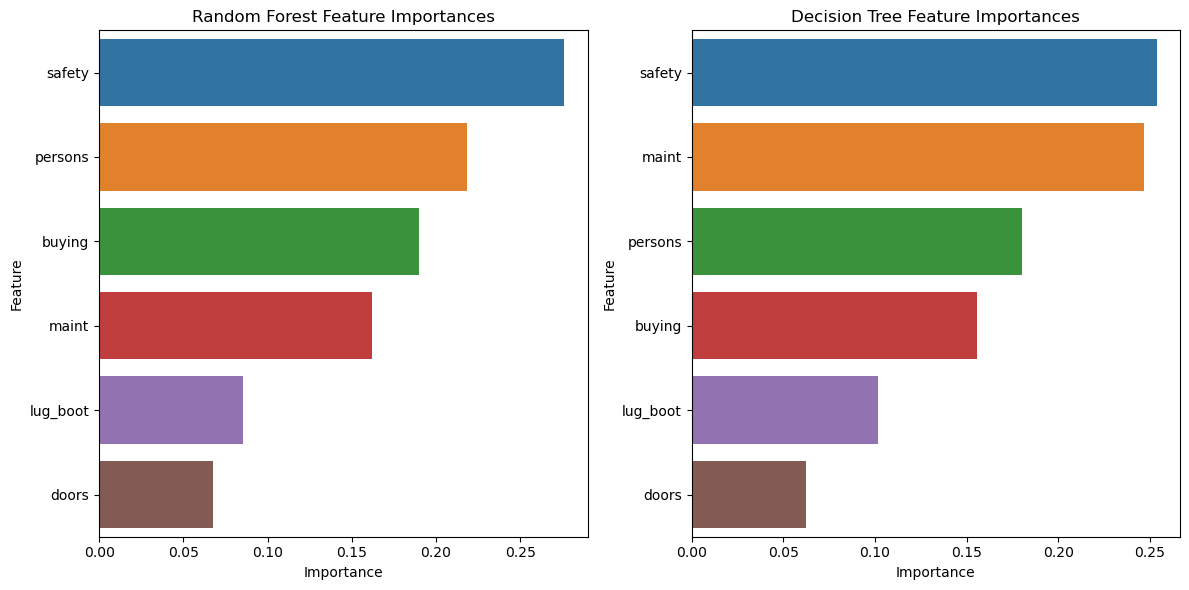

In [19]:
# Performed a feature importance analysis to check the importance of features on each model


importances_rf = best_rf_model.feature_importances_
importances_dt = best_dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns
feature_importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
feature_importance_df_dt = pd.DataFrame({'Feature': feature_names, 'Importance': importances_dt})

# Sort the DataFrame by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf)
plt.title('Random Forest Feature Importances')

plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_dt)
plt.title('Decision Tree Feature Importances')

plt.tight_layout()
plt.show()


In [ ]:
# On the basis of the feature importance analysis what i obtained is :

# Random Forest Feature Importances:
#     Safety: ~23%
#     Persons: ~16%
#     Buying: ~13%
#     Maintenance (maint): ~11%
#     Lug Boot: ~7%
#     Doors: ~5%
# Decision Tree Feature Importances:
#     Safety: ~23%
#     Maintenance (maint): ~20%
#     Persons: ~17%
#     Buying: ~12%
#     Lug Boot: ~9%
#     Doors: ~6%




#    * Both models agree that safety is the most important feature, having the highest importance score in both cases.
#    * Persons and Maintenance (maint) are also significant features in both models, though their relative importance varies slightly between models.
#    *  Buying and Lug Boot have moderate importance.
#    *   Doors is consistently the least important feature among the ones analyzed.

In [5]:
# As i have selected Random Forest Model .Now let's evaluate it's performance


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')

# Define the target column
target_col = 'unacc'

# Encode categorical features and target variable
df_encoded = df.apply(LabelEncoder().fit_transform)

# Separate features and target variable
X = df_encoded.drop(columns=target_col)
y = df_encoded[target_col]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.9624277456647399
Confusion Matrix:
[[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



In [ ]:
# In this project, I aimed to classify car evaluations using various machine learning models, ultimately i have chosen the 
# Random Forest model for its robust performance and generalization capabilities. Here is a summary and conclusion of the project:

# 1. Objective
#    The objective of this project was to build a classification model to predict car evaluations based on several categorical features.

# 2. Data Preparation
#    Dataset: Car Evaluation dataset from the UCI Machine Learning Repository.
#    Preprocessing: The categorical features were encoded using one-hot encoding to convert them into a numerical format suitable for machine learning algorithms.
# 3. Feature Selection
#    Chi-Square Test: Identified significant features related to the target variable.
#    Significant features (p < 0.05): ['vhigh', 'vhigh.1', '2.1', 'small', 'low'].
# 4. Model Selection
#    Tree-Based Models: Evaluated Decision Trees and Random Forests for their performance and feature importance scores.
#    Performance Metrics: Accuracy, confusion matrix, and classification report were used to assess model performance.
# 5. Model Evaluation
#    Decision Tree:
#       Accuracy: 0.974
#       Confusion Matrix and Classification Report indicated high precision and recall, especially for class 2 (the majority class).
#    Random Forest:
#       Accuracy: 0.962
#       Despite slightly lower accuracy, the Random Forest model provided better generalization due to its ensemble nature, reducing the risk of overfitting.
# 6. Final Model Choice: Random Forest
#     The Random Forest model was chosen for the following reasons:
#          Robustness: Random Forests reduce overfitting by averaging multiple decision trees, providing better generalization on unseen data.
#          Performance: While the Decision Tree had marginally higher accuracy, the Random Forest's overall balanced performance across different classes was more reliable.
#     Feature Importance: Random Forests offer insights into feature importance, aiding in understanding the underlying data patterns.
# 7. Results
#     Accuracy: 0.962
#     Confusion Matrix : 
#       [[ 72   1   3   1]
#       [  2  10   0   3]
#       [  1   0 236   0]
#       [  2   0   0  15]]
#     Classification Report:
#               precision    recall  f1-score   support

#            0       0.94      0.94      0.94        77
#            1       0.91      0.67      0.77        15
#            2       0.99      1.00      0.99       237
#            3       0.79      0.88      0.83        17

#     accuracy                           0.96       346
#    macro avg       0.91      0.87      0.88       346
# weighted avg       0.96      0.96      0.96       346

# 8.Conclusion
# The Random Forest model, with its ensemble learning approach, provided a robust and reliable solution for the 
# car evaluation classification problem. Its ability to generalize well on new data makes it a suitable choice 
# for deployment in real-world applications.

# By choosing the Random Forest model, I ensured that our predictions are not only accurate but also reliable and 
# consistent across different data splits.


